<a href="https://colab.research.google.com/github/sunita-1717/LGMVIP--Data-Science/blob/main/Advanced%20Level/Task%204/Next_Word_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LetsGrowMore (LGMVIP) - "DATA SCIENCE INTERN"
**AUTHOR - SUNITA KURANE.**

**ADVANCED LEVEL TASK**

**TASK 4 - Next Word Prediction**

---



# Loading Libraries

In [1]:
import numpy as np
import os

import matplotlib.pyplot as plt

# pickle
import pickle

# tf and keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from keras.utils.vis_utils import plot_model

# Reading the data

In [2]:
file = open("/content/1661-0.txt", "r", encoding = "utf8")
lines = []

for i in file:
    lines.append(i)

data = ""

for i in lines:
    data = ' '. join(lines)

data = data.replace('\n', '').replace('\r', '').replace('\ufeff', '').replace('“', '').replace("”", '')

data = data.split()
data = ' '.join(data)
data[:500]

"Project Gutenberg's The Adventures of Sherlock Holmes, by Arthur Conan Doyle This eBook is for the use of anyone anywhere at no cost and with almost no restrictions whatsoever. You may copy it, give it away or re-use it under the terms of the Project Gutenberg License included with this eBook or online at www.gutenberg.net Title: The Adventures of Sherlock Holmes Author: Arthur Conan Doyle Release Date: November 29, 2002 [EBook #1661] Last Updated: May 20, 2019 Language: English Character set en"

In [3]:
len(data)

573660

# Preprocessing

In [4]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])

pickle.dump(tokenizer, open('tokenizer1.pkl', 'wb'))

sequence_data = tokenizer.texts_to_sequences([data])[0]
sequence_data[:10]

[142, 4680, 1, 986, 5, 125, 33, 46, 556, 2164]

In [5]:
len(sequence_data)

108958

In [6]:
vocab_size = len(tokenizer.word_index) + 1
vocab_size

8624

In [7]:
sequences = []
for i in range(3, len(sequence_data)):
    words = sequence_data[i-3:i+1]
    sequences.append(words)

print("The length of sequences :", len(sequences))
sequences = np.array(sequences)
sequences[:10]

The length of sequences : 108955


array([[ 142, 4680,    1,  986],
       [4680,    1,  986,    5],
       [   1,  986,    5,  125],
       [ 986,    5,  125,   33],
       [   5,  125,   33,   46],
       [ 125,   33,   46,  556],
       [  33,   46,  556, 2164],
       [  46,  556, 2164, 2165],
       [ 556, 2164, 2165,   27],
       [2164, 2165,   27,  987]])

# Train and Test

In [8]:
X = []
y = []

for i in sequences:
    X.append(i[0:3])
    y.append(i[3])

X = np.array(X)
y = np.array(y)

In [9]:
print("Data :\n", X[:10])
print()
print("Response :\n", y[:10])

Data :
 [[ 142 4680    1]
 [4680    1  986]
 [   1  986    5]
 [ 986    5  125]
 [   5  125   33]
 [ 125   33   46]
 [  33   46  556]
 [  46  556 2164]
 [ 556 2164 2165]
 [2164 2165   27]]

Response :
 [ 986    5  125   33   46  556 2164 2165   27  987]


In [10]:
y = to_categorical(y, num_classes=vocab_size)
y[:10]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

# LSTM

In [11]:
model = Sequential()
model.add(Embedding(vocab_size, 10, input_length=3))
model.add(LSTM(1000, return_sequences=True))
model.add(LSTM(1000))
model.add(Dense(1000, activation="relu"))
model.add(Dense(vocab_size, activation="softmax"))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 3, 10)             86240     
                                                                 
 lstm (LSTM)                 (None, 3, 1000)           4044000   
                                                                 
 lstm_1 (LSTM)               (None, 1000)              8004000   
                                                                 
 dense (Dense)               (None, 1000)              1001000   
                                                                 
 dense_1 (Dense)             (None, 8624)              8632624   
                                                                 
Total params: 21,767,864
Trainable params: 21,767,864
Non-trainable params: 0
_________________________________________________________________


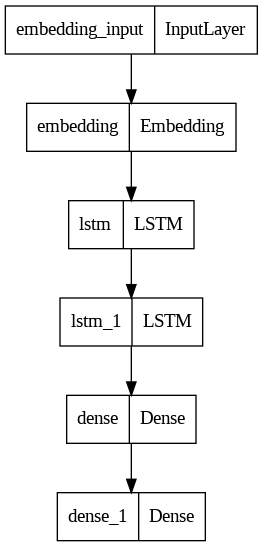

In [13]:
keras.utils.plot_model(model, show_layer_names=True)

# Modeling

In [14]:
checkpoint = ModelCheckpoint("nextword1.h5", monitor='loss', verbose=1, save_best_only=True)
model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.001))
lstm = model.fit(X, y, validation_split=0.2, epochs=5, batch_size=128, shuffle=True, callbacks=[checkpoint]).history

Epoch 1/5
681/681 [==============================] - ETA: 0s - loss: 6.5664
Epoch 1: loss improved from inf to 6.56635, saving model to nextword1.h5
681/681 [==============================] - 794s 1s/step - loss: 6.5664 - val_loss: 6.4919
Epoch 2/5
681/681 [==============================] - ETA: 0s - loss: 5.9643
Epoch 2: loss improved from 6.56635 to 5.96432, saving model to nextword1.h5
681/681 [==============================] - 789s 1s/step - loss: 5.9643 - val_loss: 6.2634
Epoch 3/5
681/681 [==============================] - ETA: 0s - loss: 5.5646
Epoch 3: loss improved from 5.96432 to 5.56463, saving model to nextword1.h5
681/681 [==============================] - 821s 1s/step - loss: 5.5646 - val_loss: 6.2412
Epoch 4/5
681/681 [==============================] - ETA: 0s - loss: 5.3030
Epoch 4: loss improved from 5.56463 to 5.30300, saving model to nextword1.h5
681/681 [==============================] - 821s 1s/step - loss: 5.3030 - val_loss: 6.3390
Epoch 5/5
681/681 [=============

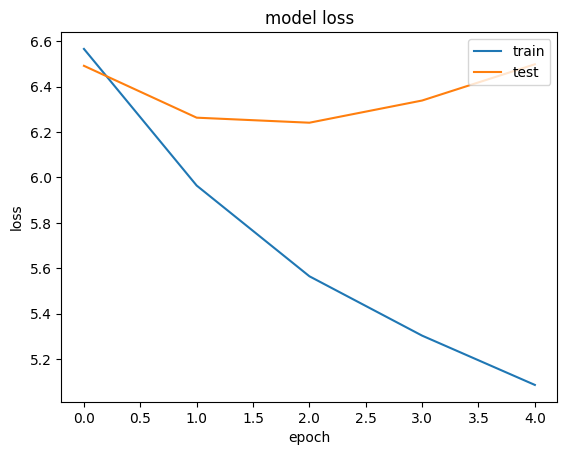

In [15]:
plt.plot(lstm['loss'])
plt.plot(lstm['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

# Results

In [16]:
model = load_model("nextword1.h5")
tokenizer = pickle.load(open("tokenizer1.pkl", 'rb'))

In [17]:
def predict_next_words(model, tokenizer, text) :

    sequence = tokenizer.texts_to_sequences([text])
    sequence = np.array(sequence)

    preds = np.argmax(model.predict(sequence))
    predicted_word = ""

    for key, value in tokenizer.word_index.items() :
        if value == preds :
            predicted_word = key
            break

    return predicted_word

In [18]:
l = ["The Adventures of", "by Arthur Conan", "it is all", "0"]

for i in l :

    text = i

    if text == "0" :
        print()
        print("Execution completed...")
        break

    else :
        try :
            text = text.split(" ")
            text = text[-3:]
            print("Input :", i)
            print("Output : ", i, predict_next_words(model, tokenizer, text))
            print()

        except Exception as e :
            print("Error occured : ", e)
            continue

Input : The Adventures of
1/1 [==============================] - 1s 870ms/step
Output :  The Adventures of the

Input : by Arthur Conan
1/1 [==============================] - 0s 40ms/step
Output :  by Arthur Conan man

Input : it is all
1/1 [==============================] - 0s 40ms/step
Output :  it is all to


Execution completed...
